In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import json
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [95]:
df=pd.read_csv("sample_data/dataOut.csv", sep =',')

df.shape

(8191, 1025)

In [96]:

df.columns =[*df.columns[:-1], 'id']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,id
0,0.0,0.000000,1.208960,0.000000,0.000000,1.05667,0.759125,0.0,0.0,1.029650,...,0.383121,0.0,0.00000,0.121521,0.000000,0.227247,1.01344,0.000000,0.048631,1
1,0.0,0.512417,0.600426,0.000000,0.993237,0.00000,0.000000,0.0,0.0,0.000000,...,0.439741,0.0,0.65932,1.283280,1.043590,0.751813,1.85373,1.319160,1.124250,15
2,0.0,0.983987,0.735701,0.504862,0.037960,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,2.81985,1.720730,1.860800,0.000000,2.19911,0.000000,0.841714,7
3,0.0,1.357470,0.378291,0.000000,1.547730,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,1.15164,1.064290,0.666223,0.000000,1.09855,0.473512,1.279340,9
4,0.0,0.330974,0.313360,0.000000,0.000000,1.94668,2.058530,0.0,0.0,0.854637,...,0.000000,0.0,0.00000,0.245968,0.000000,0.552027,0.00000,0.000000,0.648538,0


In [97]:
X=df.drop('id', axis= 1, inplace=False)


In [98]:
Y=df['id']
X.shape,Y.shape

((8191, 1024), (8191,))

In [99]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 15000
data_subset_x = df.loc[rndperm[:N],:].copy()
data_subset_y = Y.loc[rndperm[:N]].copy()

In [100]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8191 samples in 0.007s...
[t-SNE] Computed neighbors for 8191 samples in 5.382s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8191
[t-SNE] Computed conditional probabilities for sample 2000 / 8191
[t-SNE] Computed conditional probabilities for sample 3000 / 8191
[t-SNE] Computed conditional probabilities for sample 4000 / 8191
[t-SNE] Computed conditional probabilities for sample 5000 / 8191
[t-SNE] Computed conditional probabilities for sample 6000 / 8191
[t-SNE] Computed conditional probabilities for sample 7000 / 8191
[t-SNE] Computed conditional probabilities for sample 8000 / 8191
[t-SNE] Computed conditional probabilities for sample 8191 / 8191
[t-SNE] Mean sigma: 6.509925
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.274017
[t-SNE] KL divergence after 300 iterations: 2.401842


In [101]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

In [102]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1017,1018,1019,1020,1021,1022,1023,id,tsne-2d-one,tsne-2d-two
0,0.0,0.000000,1.208960,0.000000,0.000000,1.05667,0.759125,0.0,0.0,1.029650,...,0.00000,0.121521,0.000000,0.227247,1.01344,0.000000,0.048631,1,-6.416305,-9.805196
1,0.0,0.512417,0.600426,0.000000,0.993237,0.00000,0.000000,0.0,0.0,0.000000,...,0.65932,1.283280,1.043590,0.751813,1.85373,1.319160,1.124250,15,-2.613781,5.558220
2,0.0,0.983987,0.735701,0.504862,0.037960,0.00000,0.000000,0.0,0.0,0.000000,...,2.81985,1.720730,1.860800,0.000000,2.19911,0.000000,0.841714,7,-3.180006,6.815330
3,0.0,1.357470,0.378291,0.000000,1.547730,0.00000,0.000000,0.0,0.0,0.000000,...,1.15164,1.064290,0.666223,0.000000,1.09855,0.473512,1.279340,9,-3.276090,5.855446
4,0.0,0.330974,0.313360,0.000000,0.000000,1.94668,2.058530,0.0,0.0,0.854637,...,0.00000,0.245968,0.000000,0.552027,0.00000,0.000000,0.648538,0,-2.728926,-7.154351


In [103]:
df['id'].unique()

array([ 1, 15,  7,  9,  0, 18, 10, 16,  2, 12,  8, 24, 22, 14,  4,  6, 20,
       13,  3, 19, 21, 17,  5, 11, 23])

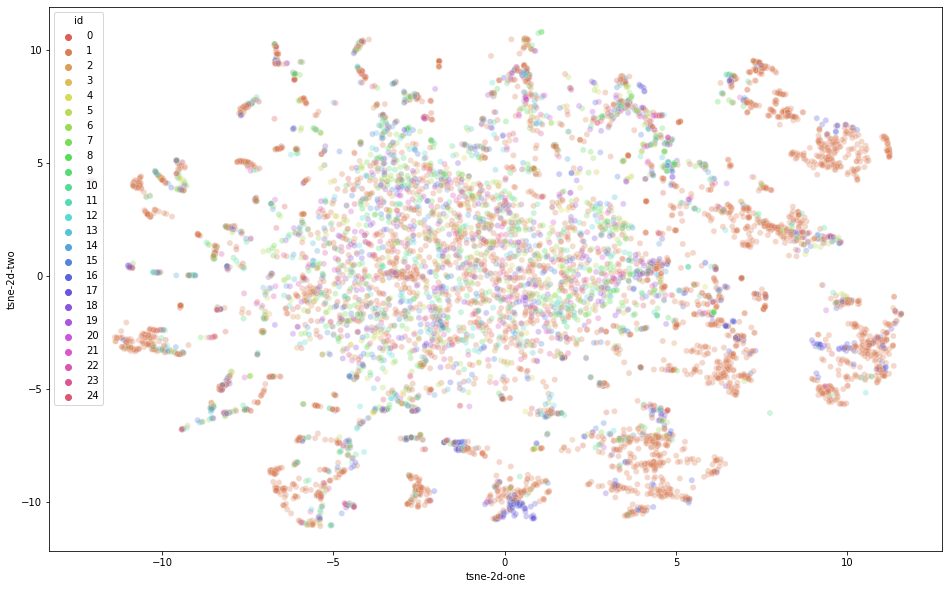

In [105]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="id",
    palette=sns.color_palette("hls", 25),
    data=df,
    legend="full",
    alpha=0.3
)